# BPMN Generator

In [8]:
from typing import Tuple
import pm4py
import random
import uuid
from pm4py.objects.bpmn.obj import BPMN
from pm4py.util import constants
import xml.etree.ElementTree as ET
from xml.dom import minidom
import pandas as pd

import sys
import os
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
from src.Process import BPMNGen
from src.Process import XMLWriter
from pm4py.visualization.bpmn import visualizer as bpmn_visualizer

In [4]:
gen1 = BPMNGen.BPMNGenerator(num_node=10, branch_ratio=0.5, seq_ratio=0.3, xor_ratio=0.3, and_ratio=0.3, loop_ratio=0., empty_loop_ratio=0., fix_name=True)

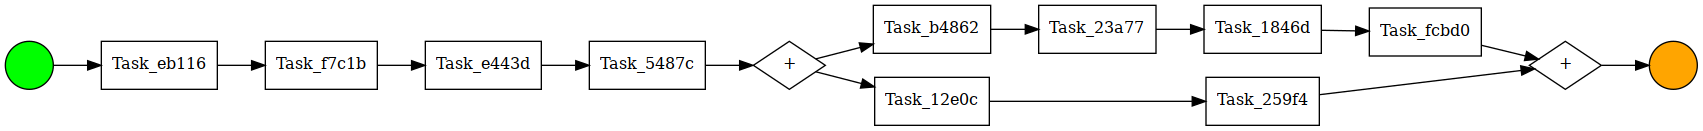

NoneType

In [7]:
bpmn, seed = gen1.generate()
pm4py.view_bpmn(bpmn)

In [23]:
parameters = bpmn_visualizer.Variants.CLASSIC.value.Parameters
gviz = bpmn_visualizer.apply(bpmn, parameters={parameters.FORMAT: "png", "bgcolor": "lavender"})


In [25]:
type(gviz)

graphviz.graphs.Digraph

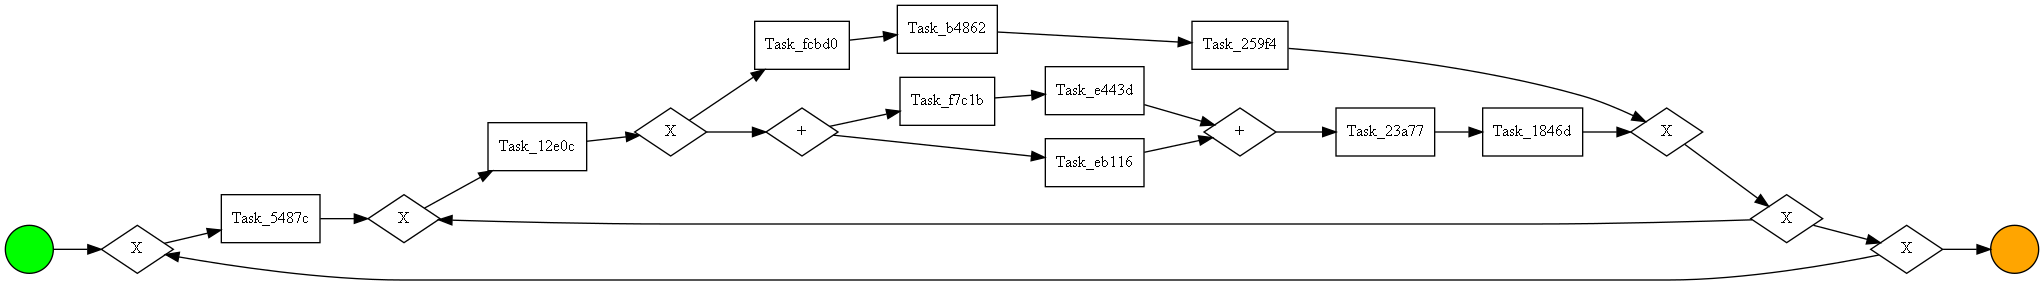

7

In [19]:

calculate_CFC(seed)

In [20]:
bpmn_lo = pm4py.objects.bpmn.layout.layouter.apply(bpmn)

In [31]:
apply(bpmn_lo, "bpmn.xml")

C:\Users\Virsi\AppData\Local\Temp\ipykernel_20156\2981285502.py:50: DeprecatedWarning: get_height is deprecated as of 2.3.0 and will be removed in 3.0.0. layout information has been moved outside the BPMN object
  {"height": str(node.get_height()), "width": str(node.get_width()),
C:\Users\Virsi\AppData\Local\Temp\ipykernel_20156\2981285502.py:50: DeprecatedWarning: get_width is deprecated as of 2.3.0 and will be removed in 3.0.0. layout information has been moved outside the BPMN object
  {"height": str(node.get_height()), "width": str(node.get_width()),
C:\Users\Virsi\AppData\Local\Temp\ipykernel_20156\2981285502.py:51: DeprecatedWarning: get_x is deprecated as of 2.3.0 and will be removed in 3.0.0. layout information has been moved outside the BPMN object
  "x": str(node.get_x()),
C:\Users\Virsi\AppData\Local\Temp\ipykernel_20156\2981285502.py:52: DeprecatedWarning: get_y is deprecated as of 2.3.0 and will be removed in 3.0.0. layout information has been moved outside the BPMN object

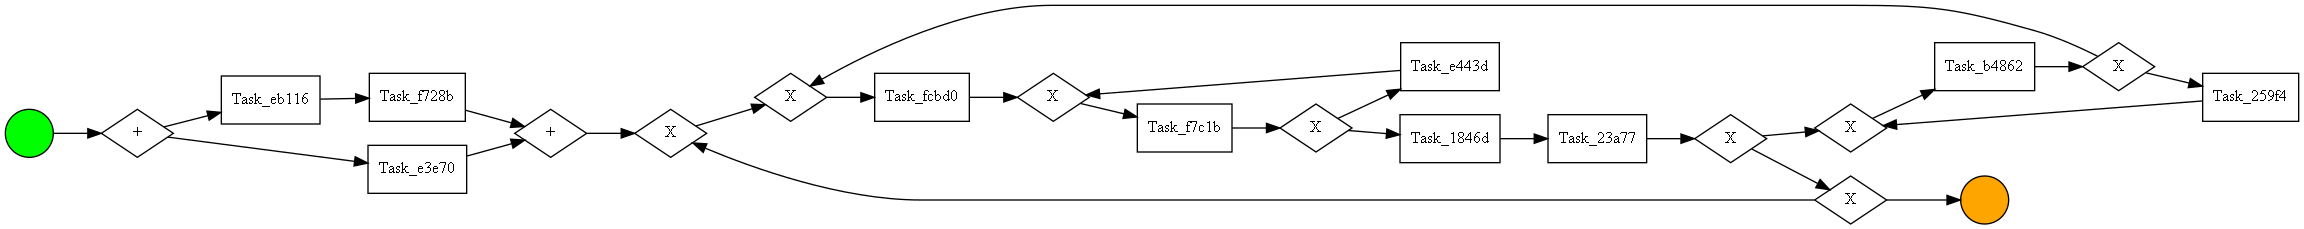

NameError: name 'calculate_CFC' is not defined

In [5]:
bpmn, seed = gen1.generate()
pm4py.view_bpmn(bpmn)
calculate_CFC(seed)

In [10]:
pm4py.objects.bpmn.exporter.variants.etree.apply()

TypeError: apply() missing 2 required positional arguments: 'bpmn_graph' and 'target_path'

In [8]:
p1

pm4py.objects.bpmn.obj.BPMN

In [6]:
def random_generation(num_node, loop=False):
    pb = random.random()
    ps = random.random()
    px = (1 - ps) * random.random()
    if loop:
        pa = (1 - ps - px) * random.random()
        pl = 1 - ps - px - pa
        pel = random.random()
    else:
        pa = 1 - ps - px
        pl = 0
        pel = 0
    gen1 = BPMN_Generator(num_node=num_node, branch_ratio=pb, seq_ratio=ps, xor_ratio=px, and_ratio=pa, loop_ratio=pl, empty_loop_ratio=pel, fix_name=True)
    return gen1.generate()

In [7]:
bpmn_model_list = []
for i in range(1, 11, 2):
    print(i)
    model_num = 0
    while True:
        bpmn, seed = random_generation(10)
        if calculate_CFC(seed) == i:
            bpmn_model_list.append(bpmn)
            model_num = model_num + 1
            if model_num > 3:
                break

1
3
5
7
9


In [19]:
list(bpmn.get_nodes())[2].get_gateway_direction().value.lower()

'converging'

In [12]:
file_index = 0
for model in bpmn_model_list:
    bpmn_lo = pm4py.objects.bpmn.layout.layouter.apply(model)
    apply(bpmn_lo, "../bpmn/bpmn" + str(file_index) + ".bpmn")
    file_index = file_index + 1

C:\Users\Virsi\AppData\Local\Temp\ipykernel_904\3013335746.py:54: DeprecatedWarning: get_height is deprecated as of 2.3.0 and will be removed in 3.0.0. layout information has been moved outside the BPMN object
  {"height": str(node.get_height()), "width": str(node.get_width()),
C:\Users\Virsi\AppData\Local\Temp\ipykernel_904\3013335746.py:54: DeprecatedWarning: get_width is deprecated as of 2.3.0 and will be removed in 3.0.0. layout information has been moved outside the BPMN object
  {"height": str(node.get_height()), "width": str(node.get_width()),
C:\Users\Virsi\AppData\Local\Temp\ipykernel_904\3013335746.py:55: DeprecatedWarning: get_x is deprecated as of 2.3.0 and will be removed in 3.0.0. layout information has been moved outside the BPMN object
  "x": str(node.get_x()),
C:\Users\Virsi\AppData\Local\Temp\ipykernel_904\3013335746.py:56: DeprecatedWarning: get_y is deprecated as of 2.3.0 and will be removed in 3.0.0. layout information has been moved outside the BPMN object
  "y": 

In [18]:
models_pd = pd.DataFrame(data=bpmn_model_list, columns=["Model"])


In [19]:
models_pd.to_pickle("../bpmn/models.pkl")

## Save BPMN

In [9]:
def apply(bpmn_graph, target_path, parameters=None):
    xml_string = get_xml_string(bpmn_graph, parameters=parameters)
    F = open(target_path, "wb")
    F.write(xml_string)
    F.close()



def get_xml_string(bpmn_graph, parameters=None):
    if parameters is None:
        parameters = {}

    import xml.etree.ElementTree as ET
    from xml.dom import minidom

    definitions = ET.Element("bpmn:definitions")
    definitions.set("xmlns:bpmn", "http://www.omg.org/spec/BPMN/20100524/MODEL")
    definitions.set("xmlns:bpmndi", "http://www.omg.org/spec/BPMN/20100524/DI")
    definitions.set("xmlns:omgdc", "http://www.omg.org/spec/DD/20100524/DC")
    definitions.set("xmlns:omgdi", "http://www.omg.org/spec/DD/20100524/DI")
    definitions.set("xmlns:xsi", "http://www.w3.org/2001/XMLSchema-instance")
    definitions.set("targetNamespace", "http://www.signavio.com/bpmn20")
    definitions.set("typeLanguage", "http://www.w3.org/2001/XMLSchema")
    definitions.set("expressionLanguage", "http://www.w3.org/1999/XPath")
    definitions.set("xmlns:xsd", "http://www.w3.org/2001/XMLSchema")
    definitions.set("xmlns:zeebe", "http://camunda.org/schema/zeebe/1.0")

    
    all_processes = set()
    process_planes = {}
    process_process = {}
    for node in bpmn_graph.get_nodes():
        all_processes.add(node.get_process())

    for process in all_processes:
        p = ET.SubElement(definitions, "bpmn:process",
                          {"id": "id" + process, "isClosed": "false", "isExecutable": "true",
                           "processType": "None"})
        process_process[process] = p
        
    diagram = ET.SubElement(definitions, "bpmndi:BPMNDiagram", {"id": "id" + str(uuid.uuid4()), "name": "diagram"})
    
    for process in all_processes:
        plane = ET.SubElement(diagram, "bpmndi:BPMNPlane",
                              {"bpmnElement": "id" + process, "id": "Process_" + str(uuid.uuid4())})
        process_planes[process] = plane

    for node in bpmn_graph.get_nodes():
        process = node.get_process()

        node_shape = ET.SubElement(process_planes[process], "bpmndi:BPMNShape",
                                   {"bpmnElement": node.get_id(), "id": node.get_id() + "_gui"})
        node_shape_layout = ET.SubElement(node_shape, "omgdc:Bounds",
                                          {"height": str(node.get_height()), "width": str(node.get_width()),
                                           "x": str(node.get_x()),
                                           "y": str(node.get_y())})

    for flow in bpmn_graph.get_flows():
        process = flow.get_process()

        flow_shape = ET.SubElement(process_planes[process], "bpmndi:BPMNEdge",
                                   {"bpmnElement": "SequenceFlow_" + str(flow.get_id()),
                                    "id": "SequenceFlow_" + str(flow.get_id()) + "_gui"})
        for x, y in flow.get_waypoints():
            waypoint = ET.SubElement(flow_shape, "omgdi:waypoint", {"x": str(x), "y": str(y)})

    for node in bpmn_graph.get_nodes():
        process = process_process[node.get_process()]

        if isinstance(node, BPMN.StartEvent):
            isInterrupting = "true" if node.get_isInterrupting() else "false"
            parallelMultiple = "true" if node.get_parallelMultiple() else "false"
            task = ET.SubElement(process, "bpmn:startEvent",
                                 {"id": node.get_id(), "isInterrupting": isInterrupting, "name": node.get_name(),
                                  "parallelMultiple": parallelMultiple})
        elif isinstance(node, BPMN.EndEvent):
            task = ET.SubElement(process, "bpmn:endEvent", {"id": node.get_id(), "name": node.get_name()})
        elif isinstance(node, BPMN.IntermediateCatchEvent):
            task = ET.SubElement(process, "bpmn:intermediateCatchEvent", {"id": node.get_id(), "name": node.get_name()})
        elif isinstance(node, BPMN.IntermediateThrowEvent):
            task = ET.SubElement(process, "bpmn:intermediateThrowEvent", {"id": node.get_id(), "name": node.get_name()})
        elif isinstance(node, BPMN.BoundaryEvent):
            task = ET.SubElement(process, "bpmn:boundaryEvent", {"id": node.get_id(), "name": node.get_name()})
        elif isinstance(node, BPMN.Task):
            task = ET.SubElement(process, "bpmn:userTask", {"id": node.get_id(), "name": node.get_name()})
        elif isinstance(node, BPMN.SubProcess):
            task = ET.SubElement(process, "bpmn:subProcess", {"id": node.get_id(), "name": node.get_name()})
        elif isinstance(node, BPMN.ExclusiveGateway):
            task = ET.SubElement(process, "bpmn:exclusiveGateway",
                                 {"id": node.get_id(), "gatewayDirection": node.get_gateway_direction().value,
                                  "name": ""})
        elif isinstance(node, BPMN.ParallelGateway):
            task = ET.SubElement(process, "bpmn:parallelGateway",
                                 {"id": node.get_id(), "gatewayDirection": node.get_gateway_direction().value,
                                  "name": ""})
        elif isinstance(node, BPMN.InclusiveGateway):
            task = ET.SubElement(process, "bpmn:inclusiveGateway",
                                 {"id": node.get_id(), "gatewayDirection": node.get_gateway_direction().value,
                                  "name": ""})
        else:
            raise Exception("Unexpected node type.")

        for in_arc in node.get_in_arcs():
            arc_xml = ET.SubElement(task, "bpmn:incoming")
            arc_xml.text = "SequenceFlow_" + str(in_arc.get_id())

        for out_arc in node.get_out_arcs():
            arc_xml = ET.SubElement(task, "bpmn:outgoing")
            arc_xml.text = "SequenceFlow_" + str(out_arc.get_id())

    for flow in bpmn_graph.get_flows():
        process = process_process[flow.get_process()]

        source = flow.get_source()
        target = flow.get_target()
        flow_xml = ET.SubElement(process, "bpmn:sequenceFlow", {"id": "SequenceFlow_" + str(flow.get_id()), "name": flow.get_name(),
                                                           "sourceRef": str(source.get_id()),
                                                           "targetRef": str(target.get_id())})

    return minidom.parseString(ET.tostring(definitions)).toprettyxml(encoding=constants.DEFAULT_ENCODING)

